In [ ]:
from pathlib import Path
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime as dt

In [ ]:
datapath = Path("../../dyndowndata/snowtest01/")

In [ ]:
mask = datapath / "glaciermask_thresh_1m_dilate2.nc"
with xr.open_dataset(mask) as src:
    glaciermask = src.glaciermask

snow_JRA55_path = datapath / "anl_land.065_snwe.reg_tl319.1973010100_1973123118"
with xr.open_dataset(snow_JRA55_path, engine="cfgrib") as src:
    snow_JRA55 = src.sd

snow_ERA5_nc_path = datapath / "reanalysis-era5-single-levels_sd_1973_12.nc"
with xr.open_dataset(snow_ERA5_nc_path) as src:
    snow_ERA5_nc = src.sd

snow_ERA5_grb_path = datapath / "synth_e5.oper.an.sfc.128_141_sd.ll025sc.1973120100_1973123123.grb"
with xr.open_dataset(snow_ERA5_grb_path) as src:
    snow_ERA5_grb = src.sd

snow_ERA5_grb_path = datapath / "synth_automask_e5.oper.an.sfc.128_141_sd.ll025sc.1973120100_1973123123.grb"
with xr.open_dataset(snow_ERA5_grb_path) as src:
    snow_ERA5_auto_grb = src.sd

snow_wrfout_4km_path = datapath / "era5_wrf_dscale_4km_1973-12-24.nc"
with xr.open_dataset(snow_wrfout_4km_path) as src:
    snow_wrfout_4km = src.SNOW

snow_wrfout_12km_path = datapath / "era5_wrf_dscale_12km_1973-12-24.nc"
with xr.open_dataset(snow_wrfout_12km_path) as src:
    snow_wrfout_12km = src.SNOW

In [ ]:
snow_JRA55

<xarray.DataArray 'sd' (time: 1460, latitude: 320, longitude: 640)>
[299008000 values with dtype=float32]
Coordinates:
  * time        (time) datetime64[ns] 1973-01-01 ... 1973-12-31T18:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  (time) datetime64[ns] ...
Attributes: (12/24)
    GRIB_paramId:                             228141
    GRIB_numberOfPoints:                      204800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_gg
    ...                                       ...
    GRIB_name:                                Snow depth water equivalent
    GRIB_shortName:                           sd
    GRIB_units:                               kg m**-2
    long_name:                                Snow depth water equivalent
    units:                                    kg m**-2
    standard_name:                            unknown

In [ ]:
xr.open_dataset(snow_wrfout_12km_path)

<xarray.Dataset>
Dimensions:       (Time: 24, south_north: 204, west_east: 264, interp_level: 9,
                   soil_layers_stag: 4)
Coordinates:
  * Time          (Time) datetime64[ns] 1973-12-24 ... 1973-12-24T23:00:00
    XLONG         (south_north, west_east) float32 ...
    XLAT          (south_north, west_east) float32 ...
    XTIME         (Time) float32 ...
  * interp_level  (interp_level) float64 200.0 300.0 500.0 ... 925.0 950.0 1e+03
Dimensions without coordinates: south_north, west_east, soil_layers_stag
Data variables: (12/43)
    slp           (Time, south_north, west_east) float32 ...
    ctt           (Time, south_north, west_east) float32 ...
    dbz           (Time, interp_level, south_north, west_east) float32 ...
    rh2           (Time, south_north, west_east) float32 ...
    T2            (Time, south_north, west_east) float32 ...
    Q2            (Time, south_north, west_east) float32 ...
    ...            ...
    u             (Time, interp_level, south_north, west_east) float32 ...
    v             (Time, interp_level, south_north, west_east) float32 ...
    w             (Time, interp_level, south_north, west_east) float32 ...
    rainnc        (Time, south_north, west_east) float32 ...
    rainc         (Time, south_north, west_east) float32 ...
    acsnow        (Time, south_north, west_east) float32 ...
Attributes:
    date:     2023-11-17T05:18:09.982283
    data:     Downscaled ERA5 using WRF
    info:     Alaska Climate Adaptation Science Center, University of Alaska ...
    contact:  cwaigl@alaska.edu
    version:  WRF V4.5.1 - project v. 1.1

In [ ]:
glaciermask = glaciermask.where(glaciermask==1)
glaciermask

<xarray.DataArray 'glaciermask' (latitude: 721, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    crs        <U1 ''
Attributes:
    title:        glaciermask for ERA5 - 1m July snow depth, dilated by 2 pix...
    institution:  International Arctic Research Center, UAF
    source:       Python, data file version  0.9
    author:       Chris Waigl cwaigl@alaska.edu 
    history:      2023-03-03

In [ ]:
snow_wrfout_12km.XLONG.min(), snow_wrfout_12km.XLONG.max(), snow_wrfout_12km.XLAT.min(), snow_wrfout_12km.XLAT.max(), snow_wrfout_12km.XLONG[-1, -1]

(<xarray.DataArray 'XLONG' ()>
 array(-179.99875, dtype=float32),
 <xarray.DataArray 'XLONG' ()>
 array(179.9993, dtype=float32),
 <xarray.DataArray 'XLAT' ()>
 array(50.5549, dtype=float32),
 <xarray.DataArray 'XLAT' ()>
 array(75.17608, dtype=float32),
 <xarray.DataArray 'XLONG' ()>
 array(-108.27594, dtype=float32)
 Coordinates:
     XLONG    float32 -108.3
     XLAT     float32 69.59)

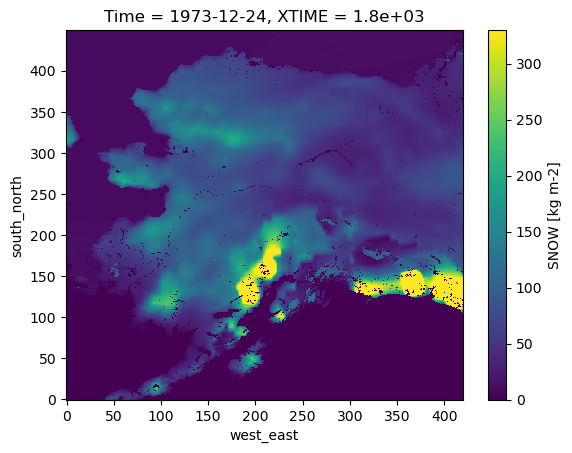

In [ ]:
snow_wrfout_4km.isel(Time=0).plot()

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_10382/3176355783.py:1: UserWarning: "true_scale_latitude" parameter is only used for polar stereographic projections. Consider the use of "scale_factor" instead.
  projection = ccrs.Stereographic(


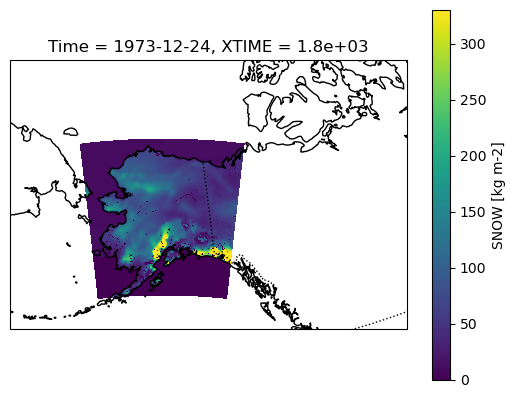

In [ ]:
projection = ccrs.Stereographic(
    central_longitude=-152.0, # central_latitude=64.0, 
    true_scale_latitude=64)
ax = plt.axes(projection=projection)
ax.set_extent([-180, -108, 50, 76])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
snow_wrfout_4km.isel(Time=0).plot(
    x="XLONG", y="XLAT",
    transform=ccrs.PlateCarree(),
    ax=ax,
)

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_10382/1330451812.py:1: UserWarning: "true_scale_latitude" parameter is only used for polar stereographic projections. Consider the use of "scale_factor" instead.
  projection = ccrs.Stereographic(


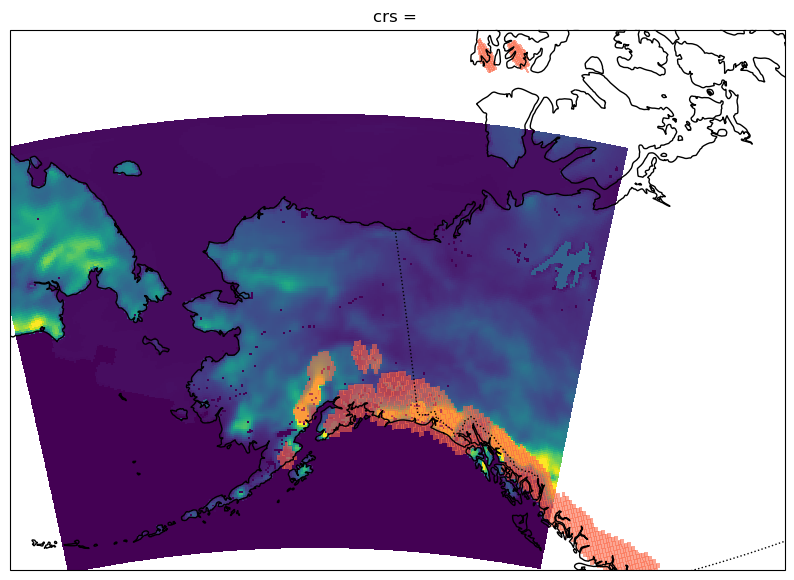

In [ ]:
projection = ccrs.Stereographic(
    central_longitude=-152.0, # central_latitude=64.0, 
    true_scale_latitude=64)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([180.5, -110, 50, 76])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
snow_wrfout_12km.isel(Time=0).plot(
    x="XLONG", y="XLAT",
    transform=ccrs.PlateCarree(),
    ax=ax, add_colorbar=False
)
glaciermask.where(glaciermask==1).plot(
    transform=ccrs.PlateCarree(),
    ax=ax, cmap="Reds", alpha=0.6, add_colorbar=False
)

In [ ]:
snow_ERA5_grb.where(snow_ERA5_grb < 1).sel(time=dt.datetime(1973, 12, 24, 0, 0))

<xarray.DataArray 'sd' (latitude: 721, longitude: 1440)>
array([[-3.8318098e-19, -3.8318098e-19, -3.8318098e-19, ...,
        -3.8318098e-19, -3.8318098e-19, -3.8318098e-19],
       [-3.8318098e-19, -3.8318098e-19, -3.8318098e-19, ...,
        -3.8318098e-19, -3.8318098e-19, -3.8318098e-19],
       [-3.8318098e-19, -3.8318098e-19, -3.8318098e-19, ...,
        -3.8318098e-19, -3.8318098e-19, -3.8318098e-19],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
    number      int64 0
    time        datetime64[ns] 1973-12-24
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] 1973-12-24
Attributes: (12/30)
    GRIB_paramId:                             141
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           sd
    GRIB_totalNumber:                         0
    GRIB_units:                               m of water equivalent
    long_name:                                Snow depth
    units:                                    m of water equivalent
    standard_name:                            lwe_thickness_of_surface_snow_a...

In [ ]:
combined_DS = snow_ERA5_nc.where(
            snow_ERA5_nc < 1).combine_first(
            snow_JRA55.fillna(0).interp_like(
            snow_ERA5_nc, method='linear') / 1000)

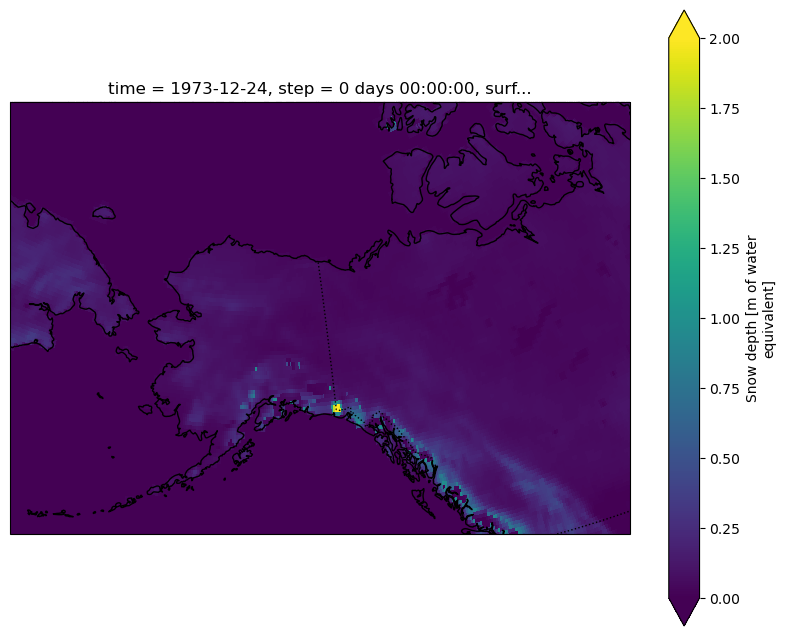

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([180.5, -110, 50, 76])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
combined_DS.sel(time=dt.datetime(1973, 12, 24, 0, 0)).plot(
    transform=ccrs.PlateCarree(),
    ax=ax, vmin=0, vmax=2, cmap='viridis', #add_colorbar=False
)
# glaciermask.where(glaciermask==1).plot(
#     transform=ccrs.PlateCarree(),
#     ax=ax, cmap="Reds", alpha=0.4, add_colorbar=False
# )

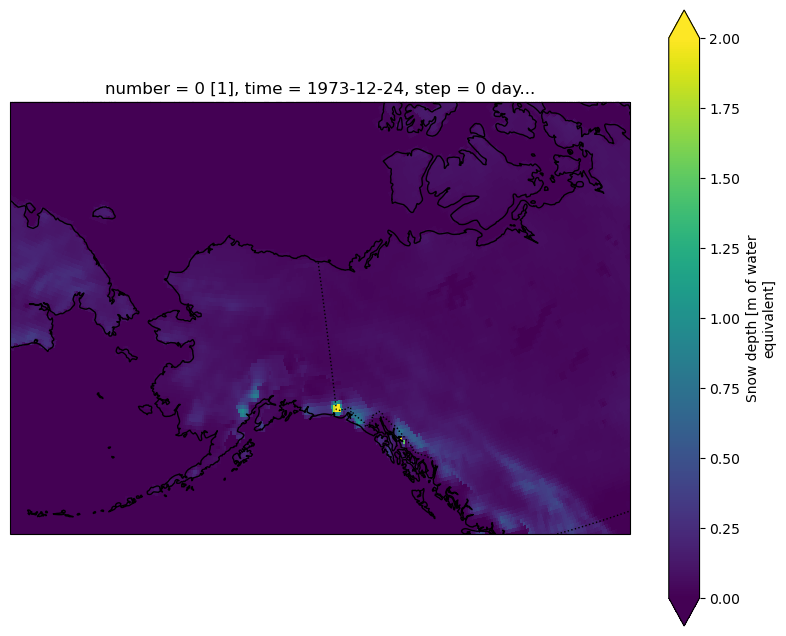

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([180.5, -110, 50, 76])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
snow_ERA5_grb.sel(time=dt.datetime(1973, 12, 24, 0, 0)).plot(
    transform=ccrs.PlateCarree(),
    ax=ax, vmin=0, vmax=2, cmap='viridis', 
)
# glaciermask.where(glaciermask==1).plot(
#     transform=ccrs.PlateCarree(),
#     ax=ax, cmap="Reds", alpha=0.6, add_colorbar=False
# )

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_10382/1365214634.py:1: UserWarning: "true_scale_latitude" parameter is only used for polar stereographic projections. Consider the use of "scale_factor" instead.
  projection = ccrs.Stereographic(


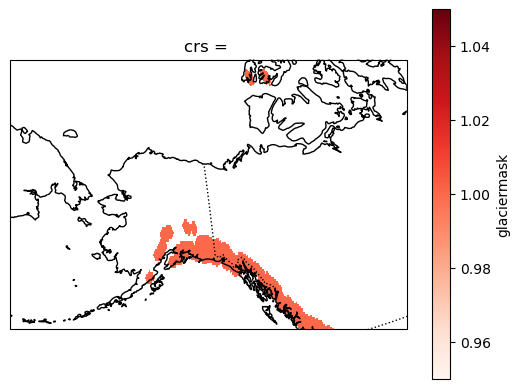

In [ ]:
projection = ccrs.Stereographic(
    central_longitude=-152.0, 
    true_scale_latitude=64)
ax = plt.axes(projection=projection)
ax.set_extent([-180, -108.25, 50.5, 76.2])
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')
glaciermask.plot(
    transform=ccrs.PlateCarree(),
    ax=ax, cmap="Reds"
)